# MSc Project : analysis 02 complete data

### Setting up the environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as m
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import netCDF4
# import pandas as pd
import dask
# from mpl_toolkits.basemap import Basemap
# from datetime import datetime
# from datetime import timedelta
# from scipy import stats
# import scipy.interpolate as interp 
%matplotlib inline

In [2]:
# from dask.distributed import Client

In [3]:
from functions import ccplot, binning, scaling

In [4]:
# import seaborn as sns
# Use seaborn style defaults and set default figure size
# plt.style.use('seaborn-pastel')
# sns.set_theme(style="ticks")
# plt.style.use(['science', 'notebook'])
plt.style.use('tableau-colorblind10')

In [5]:
# Colormap selection
xr.set_options(cmap_divergent='BrBG', cmap_sequential='YlGnBu')

In [6]:
fsize = 15
tsize = 18

tdir = 'in'

major = 5.0
minor = 3.0

# plt.style.use(style)
plt.rcParams['text.usetex'] = False
plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = tsize
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = major
plt.rcParams['ytick.minor.size'] = minor
plt.rcParams['axes.linewidth'] = 1.4
plt.rcParams['legend.handlelength'] = 1.0

In [7]:
# making a new colomap -> tmap

n = 35
diff = 0.5
cmap = plt.cm.BrBG
cmap2 = plt.cm.RdBu_r
lower = cmap(np.linspace(0, diff, n))
lower2 = cmap2(np.linspace(0, diff, n))
white = np.ones((7, 4))
white2 = np.ones((5, 4))
upper = cmap(np.linspace(1-diff, 1, n))
upper2 = cmap2(np.linspace(1-diff, 1, n))
colors = np.vstack((lower, white, upper))
colors2 = np.vstack((lower2, white2, upper2))
tmap = m.colors.LinearSegmentedColormap.from_list('map_white', colors)
tmap2 = m.colors.LinearSegmentedColormap.from_list('map_white', colors2)

In [8]:
n = 35
diff = 0.5
cmap = plt.cm.BrBG
cmap2 = plt.cm.RdBu
lower = cmap(np.linspace(0, diff, n))
white = np.ones((2, 4))
upper = cmap2(np.linspace(1-diff, 1, n))
colors = np.vstack((lower, white, white, upper))
BrBU = m.colors.LinearSegmentedColormap.from_list('map_white', colors)

In [9]:
# client = Client(memory_limit='60GB')

### Impoting and preparing data

In [10]:
# gpm = xr.open_mfdataset('./data/GPM_lowres_data/*.nc', chunks=dict(time=1000, lat=40, lon=40))
# gpm = gpm.sel(time = slice("2000-06-01 00:00:00","2020-12-31 23:30:00"))
# precip = (gpm.precipCal.resample(time = '1H').sum() / 2)
# precip

In [12]:
imd_precip = xr.open_mfdataset('./data/imd_precip/*.nc', chunks=dict(time=1000, lat=40, lon=40))
# imd_precip = imd_precip.tranpose('TIME', 'LATITUDE', 'LONGITUDE')
imd_precip = imd_precip.rename_dims({'TIME':'time', 'LATITUDE':'lat', 'LONGITUDE':'lon'})
imd_precip = imd_precip.rename({'TIME':'time', 'LATITUDE':'lat', 'LONGITUDE':'lon'})
imd_precip = imd_precip.isel(lat = 70, lon = 74)
imd_precip

<xarray.Dataset>
Dimensions:   (time: 7671)
Coordinates:
    lon       float64 85.0
    lat       float64 24.0
  * time      (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2020-12-31
Data variables:
    RAINFALL  (time) float64 dask.array<chunksize=(366,), meta=np.ndarray>
Attributes:
    history:      FERRET V7.5 (optimized) 16-Mar-22
    Conventions:  CF-1.6

In [13]:
# era_precip = xr.open_mfdataset('./data/era_precip/*.nc', chunks=dict(time=1000, lat=40, lon=40))
# # era = era.sel(expver=1, drop=True)
# era_precip = era_precip.transpose('time', 'latitude', 'longitude')
# era_precip = era_precip.rename_dims({'longitude':'lon', 'latitude':'lat'})
# era_precip = era_precip.rename({'longitude':'lon', 'latitude':'lat'})
# # era_precip = era_precip.sel(time = slice("2000-06-01 00:00:00","2020-12-31 23:00:00"))
# # era_precip = era_precip.reindex(lat = era_precip.lat[::-1]).chunk(dict(time=1000, lat =40, lon=40))
# era_precip = era_precip.isel(lat = 48, lon=68)
# era_precip

In [26]:
mfdata_DIR2 = './data/era_data/*.nc'

# era = xr.open_mfdataset(mfdata_DIR2, chunks=dict(time=8000, lat=40, lon=40), engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
# era = xr.open_mfdataset(mfdata_DIR2, chunks=dict(time=1000, lat=40, lon=40), engine='netcdf4', parallel=True)
# era = xr.open_mfdataset(mfdata_DIR2, engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
era = xr.open_mfdataset(mfdata_DIR2, chunks=dict(time=1000, lat=40, lon=40))

In [27]:
# era = era.unify_chunks()
# era.chunks
# era = era.sel(expver=1, drop=True)
era = era.transpose('time', 'latitude', 'longitude')
era = era.rename_dims({'longitude':'lon', 'latitude':'lat'})
era = era.rename({'longitude':'lon', 'latitude':'lat'})
# era = era.sel(time = slice("2000-06-01 00:00:00","2020-12-31 23:00:00"))
# era = era.reindex(lat = era.lat[::-1]).chunk(dict(time=1000, lat =40, lon=40))
era = era.isel(lat =64, lon=100)
era

<xarray.Dataset>
Dimensions:  (time: 184104)
Coordinates:
    lon      float32 85.0
    lat      float32 24.0
  * time     (time) datetime64[ns] 2000-01-01 ... 2020-12-31T23:00:00
Data variables:
    u10      (time) float32 dask.array<chunksize=(1000,), meta=np.ndarray>
    v10      (time) float32 dask.array<chunksize=(1000,), meta=np.ndarray>
    d2m      (time) float32 dask.array<chunksize=(1000,), meta=np.ndarray>
    t2m      (time) float32 dask.array<chunksize=(1000,), meta=np.ndarray>
    mx2t     (time) float32 dask.array<chunksize=(1000,), meta=np.ndarray>
    mn2t     (time) float32 dask.array<chunksize=(1000,), meta=np.ndarray>
    sst      (time) float32 dask.array<chunksize=(1000,), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2021-10-02 12:58:09 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

In [28]:
t2m = era.t2m.resample(time = '24H').mean()
d2m = era.d2m.resample(time = '24H').mean()
precip = imd_precip.RAINFALL
# precip = (era_precip.tp*1000)
# precip = precip
# temp = era_pres.t.resample(time = '24H').mean()
# omega = era_pres.w.resample(time = '24H').mean()
# vimd = era2.vimd.resample(time = '24H').sum()
# cape = era4.cape.resample(time = '24H').mean()
# u850 = (era3.u.sel(level=850).drop('level')).resample(time = '24H').mean()
# v850 = (era3.v.sel(level=850).drop('level')).resample(time = '24H').mean()
# q850 = (era_pres.q.sel(level=850).drop('level')).resample(time = '24H').mean()
# # vimd = era2.vimd

In [29]:
t2m

<xarray.DataArray 't2m' (time: 7671)>
dask.array<stack, shape=(7671,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2020-12-31
    lon      float32 85.0
    lat      float32 24.0

## Binning

In [30]:
ds_comb = xr.merge([precip, t2m, d2m])
# ds_comb = xr.merge([precip, t2m, d2m, vimd, cape, u850, v850, q850])
# ds_comb2 = xr.merge([temp, omega])
ds_comb

<xarray.Dataset>
Dimensions:   (time: 7671)
Coordinates:
  * time      (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2020-12-31
    lon       float64 85.0
    lat       float64 24.0
Data variables:
    RAINFALL  (time) float64 dask.array<chunksize=(366,), meta=np.ndarray>
    t2m       (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    d2m       (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes:
    long_name:  Rainfall
    units:      mm
    history:    From ind2000_rfp25.grd

In [31]:
mon = [6,7,8,9]
premon = [3,4,5]
postmon = [10,11,12]
wint = [1,2]

In [32]:
ds_comb_mon = xr.concat([list(ds_comb.groupby('time.month'))[i-1][1] for i in mon], dim='time')
# ds_comb2_mon = xr.concat([list(ds_comb2.groupby('time.month'))[i-1][1] for i in mon], dim='time')
# ds_comb2_mon

In [35]:
ds_comb_mon = ds_comb_mon.chunk(dict(time=-1)).sortby('time.year')
# ds_comb_mon = ds_comb_mon.chunk(dict(time=-1, lat=40, lon=40)).sortby('time.year')
# ds_comb2_mon = ds_comb2_mon.chunk(dict(time=-1, lat=40, lon=40)).sortby('time.year')

In [36]:
ds_comb_mon

<xarray.Dataset>
Dimensions:   (time: 2562)
Coordinates:
  * time      (time) datetime64[ns] 2000-06-01 2000-06-02 ... 2020-09-30
    lon       float64 85.0
    lat       float64 24.0
Data variables:
    RAINFALL  (time) float64 dask.array<chunksize=(2562,), meta=np.ndarray>
    t2m       (time) float32 dask.array<chunksize=(2562,), meta=np.ndarray>
    d2m       (time) float32 dask.array<chunksize=(2562,), meta=np.ndarray>
Attributes:
    long_name:  Rainfall
    units:      mm
    history:    From ind2000_rfp25.grd

### analysing

In [37]:
ds_comb_mon_loaded = ds_comb_mon.load()
# ds_comb_mon2_loaded = ds_comb2_mon.load()

In [38]:
precip = ds_comb_mon_loaded.RAINFALL
t2m = ds_comb_mon_loaded.t2m
d2m = ds_comb_mon_loaded.d2m
# vimd = ds_comb_mon_loaded.vimd
# cape = ds_comb_mon_loaded.cape
# u850 = ds_comb_mon_loaded.u
# v850 = ds_comb_mon_loaded.v
# q850 = ds_comb_mon_loaded.q
# temp = ds_comb_mon2_loaded.t
# omega = ds_comb_mon2_loaded.w
# # vimd = ds_comb_mon.vimd

In [150]:
precip_daily_rate = precip[::-1].rolling(time=24).sum()[::-1]
# precip_daily_rate = precip
precip_daily_rate

<xarray.DataArray 'tp' (time: 61488)>
array([2.4622788, 2.4622788, 2.4622788, ...,       nan,       nan,
             nan], dtype=float32)
Coordinates:
    lon      float32 77.0
    lat      float32 28.0
  * time     (time) datetime64[ns] 2000-06-01 ... 2020-09-30T23:00:00

In [39]:
# Set values less than 0.1 mm/hr to nan

# precip = xr.where(precip_daily_rate > 1, precip, np.nan).chunk(dict(time=-1, lat=40, lon=40))
# # precip = xr.where(precip > 0.1, precip, np.nan).chunk(dict(time=-1, lat=40, lon=40))
# precip = precip.where(precip > 0).chunk(dict(time=-1, lat=40, lon=40))
# t2m = t2m.where(precip != np.nan).chunk(dict(time=-1, lat=40, lon=40))
# d2m = d2m.where(precip != np.nan).chunk(dict(time=-1, lat=40, lon=40))

# precip = xr.where(precip_daily_rate > 1, precip, np.nan)
# precip = precip.where(precip > 0)
precip = precip.where(precip > 1)
t2m = t2m.where(precip != np.nan)
d2m = d2m.where(precip != np.nan)
# vimd = t2m.where(precip != np.nan)
# d2m = d2m.where(precip != np.nan)
# vimd = vimd.where(precip != np.nan)

In [41]:
# ind_precip = precip.chunk(RAINFALL(time=-1, lat=40, lon=40))
# ind_t2m = t2m.chunk(dict(time=-1, lat=40, lon=40))
# ind_d2m = d2m.chunk(dict(time=-1, lat=40, lon=40))

### Spatial

In [28]:
from tqdm.notebook import tqdm

In [33]:
# import numpy as np
# import matplotlib.pyplot as plt
# import xarray as xr
from scipy import stats

# Utility function

# util function to determing the number of bins
def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x, axis= None))

# No longer required
# def get_mids(x):
#     bin_mids = []
#     for i in range(0, len(x)-1):
#         bin_mid = (x[i] + x[i + 1])*0.5
#         bin_mids.append(bin_mid)

#     return np.array(bin_mids)

def get_res(x, y):
    # if np.isnan(np.sum(x)):
    #     slope, r, p = np.nan, np.nan, np.nan
    # else:
    #     slope, _, r, p, _ = stats.linregress(x, np.log(y))
    # slope, _, r, p, _ = stats.linregress(x, np.log(y))
    # return slope, r, p
    try:
        slope, _, r, p, _ = stats.linregress(x[~np.isnan(y)], np.log(y[~np.isnan(y)]))
    except:
        slope, r, p = np.nan, np.nan, np.nan
    return slope, r, p


# def binned_statistic(x, y, bins):
#     xx = stats.binned_statistic(x, x, statistic="mean", bins=bins).statistic
#     xy = stats.binned_statistic(x, y, statistic=get_quant, bins=bins).statistic

#     slope, r = get_res(xx, xy)
#     return slope, r

#-----------------------------------------------------#

# Using functions

# ---------- 2d functions ------------

# # get binned data
# def get_binned(precip_da, temp_da, percentile_val = 0.99, bins = None, bin_nr = 12):
#     # Getting the equal frequency bins
#     if bins == None:
#         bins = equalObs(temp_da, bin_nr)
#     else:
#         bins = np.array(bins)

#     # group the precipitation data according to the bins of temperature data
#     binned_precip = precip_da.groupby_bins(temp_da, bins, include_lowest=True, precision=10).quantile(percentile_val, interpolation = 'midpoint')
#     # group the temperature data by temperature bins and take mean of each bin
#     mean_temp = temp_da.groupby_bins(temp_da, bins, include_lowest=True, precision=10).mean(dim="time")
#     # return them
#     return binned_precip, mean_temp

# def get_binned_alter(precip, temp, percentile_val = 0.99, bins = None, bin_nr = 12):
#     # Getting the equal frequency bins
#     if bins == None:
#         bins = equalObs(temp, bin_nr)
#     else:
#         bins = np.array(bins)

#     # group the precipitation data according to the bins of temperature data
#     binned_precip = precip.groupby_bins(temp, bins, include_lowest=True, precision=10).quantile(percentile_val, interpolation = 'midpoint')
#     # group the temperature data by temperature bins and take mean of each bin
#     mean_temp = temp.groupby_bins(temp, bins, include_lowest=True, precision=10).mean(dim="time")
#     # return them
#     return binned_precip, mean_temp

# ---------- 3d functions ------------

def get_binned_3d(precip_da, t2m_da, d2m_da, bin_nr = 20):
    print("Starting the binning process ...")

    print("converting data-arrays to numpy arrays ...")
    # convert temperature data to numpy array
    t2m = t2m_da.to_numpy()
    d2m = d2m_da.to_numpy()
    precip = precip_da.to_numpy()
    # vimd = vimd_da.to_numpy()

    print("Getting freq bins ...")

    # get the equal freq. bins from the temperature data
    # bins_t2m = np.apply_along_axis(equalObs, 0, t2m_da, bin_nr)
    # bins_d2m = np.apply_along_axis(equalObs, 0, d2m_da, bin_nr)

    xrange = len(t2m_da[0])
    yrange = len(t2m_da[0][0])

    print("Done, now initializing zero arrays ...")
    # initialising the for loop by making zeros array for t2m and d2m to mutate
    slope_t2m_95 = np.empty((xrange, yrange))
    r_t2m_95 = np.empty((xrange, yrange))
    p_t2m_95 = np.empty((xrange, yrange))
    slope_t2m_50 = np.empty((xrange, yrange))
    r_t2m_50 = np.empty((xrange, yrange))
    p_t2m_50 = np.empty((xrange, yrange))
    slope_d2m_95 = np.empty((xrange, yrange))
    r_d2m_95 = np.empty((xrange, yrange))
    p_d2m_95 = np.empty((xrange, yrange))
    slope_d2m_50 = np.empty((xrange, yrange))
    r_d2m_50 = np.empty((xrange, yrange))
    p_d2m_50 = np.empty((xrange, yrange))
    # slope_vimd_t2m = np.empty((xrange, yrange))
    # p_vimd_t2m = np.empty((xrange, yrange))
    # slope_vimd_d2m = np.empty((xrange, yrange))
    # p_vimd_d2m = np.empty((xrange, yrange))

    print("Starting the loop ...")

    # starting loop
    for lat in tqdm(range(xrange)):
        for lon in tqdm(range(yrange), leave=False):
            bins_t2m = equalObs(np.squeeze(t2m_da[:, lat, lon]), bin_nr)
            bins_d2m = equalObs(np.squeeze(d2m_da[:, lat, lon]), bin_nr)
            # group the precipitation data according to the bins of temperature data
            grouped_precip_t2m = precip_da.isel(lat = lat, lon = lon).groupby_bins(t2m_da.isel(lat = lat, lon = lon), bins_t2m, include_lowest=True, precision=10)
            grouped_precip_d2m = precip_da.isel(lat = lat, lon = lon).groupby_bins(d2m_da.isel(lat = lat, lon = lon), bins_d2m, include_lowest=True, precision=10)
            precip_t2m_95 = grouped_precip_t2m.quantile(0.95, interpolation='midpoint')
            precip_t2m_50 = grouped_precip_t2m.quantile(0.50, interpolation='midpoint')
            precip_d2m_95 = grouped_precip_d2m.quantile(0.95, interpolation='midpoint')
            precip_d2m_50 = grouped_precip_d2m.quantile(0.50, interpolation='midpoint')

            # group the temperature data by temperature bins and take mean of each bin
            mean_t2m = t2m_da.isel(lat = lat, lon = lon).groupby_bins(t2m_da.isel(lat = lat, lon = lon), bins_t2m, include_lowest=True, precision=10).mean(dim='time')
            mean_d2m = d2m_da.isel(lat = lat, lon = lon).groupby_bins(d2m_da.isel(lat = lat, lon = lon), bins_d2m, include_lowest=True, precision=10).mean(dim='time')
            # mean_vimd_t2m = vimd_da.isel(lat = lat, lon = lon).groupby_bins(t2m_da.isel(lat = lat, lon = lon), bins_t2m, include_lowest=True, precision=10).mean(dim='time')
            # mean_vimd_d2m = vimd_da.isel(lat = lat, lon = lon).groupby_bins(d2m_da.isel(lat = lat, lon = lon), bins_d2m, include_lowest=True, precision=10).mean(dim='time')

            # convert to numpy_array()
            # precip_t2m = precip_t2m.to_numpy()
            # precip_d2m = precip_d2m.to_numpy()
            # mean_t2m = mean_t2m.to_numpy()
            # mean_d2m = mean_d2m.to_numpy()

            # idx_t2m = np.argwhere(np.isnan(precip_t2m))
            # idx_d2m = np.argwhere(np.isnan(precip_d2m))

            # precip_t2m = np.delete(precip_t2m, idx_t2m)
            # precip_d2m = np.delete(precip_d2m, idx_d2m)

            # mean_t2m = np.delete(mean_t2m, idx_t2m)
            # mean_d2m = np.delete(mean_d2m, idx_d2m)

            slope_t2m_95[lat, lon], r_t2m_95[lat, lon], p_t2m_95[lat, lon] = get_res(mean_t2m, precip_t2m_95)
            slope_t2m_50[lat, lon], r_t2m_50[lat, lon], p_t2m_50[lat, lon] = get_res(mean_t2m, precip_t2m_50)
            slope_d2m_95[lat, lon], r_d2m_95[lat, lon], p_d2m_95[lat, lon] = get_res(mean_d2m, precip_d2m_95)
            slope_d2m_50[lat, lon], r_d2m_50[lat, lon], p_d2m_50[lat, lon] = get_res(mean_d2m, precip_d2m_50)
            # slope_vimd_t2m[lat, lon], p_vimd_t2m[lat, lon] = get_res(mean_t2m, mean_vimd_t2m)
            # slope_vimd_d2m[lat, lon], p_vimd_d2m[lat, lon] = get_res(mean_d2m, mean_vimd_d2m)

#             slope_t2m[lat, lon] = slope_t2m
#             p_t2m[lat, lon] = p_t2m

#             slope_d2m[lat, lon] = slope_d2m
#             p_d2m[lat, lon] = p_d2m

            # print(f"Completed {lat+1}/{xrange} lat and {lon+1}/{yrange} lon", end="\r")

    # print("transferring the data to data-array format ...")

    # ccscale_t2m_slope = xr.DataArray(slope_t2m, dims=("lat", "lon"), coords={"lat": precip_da.coords['lat'], "lon": precip_da.coords['lon']}, attrs=dict(description="C-C scale", units="degC$^{-1}$"))

    # ccscale_t2m_r = xr.DataArray(binned_ds_sig_t2m, dims=("lat", "lon"), coords={"lat": precip_da.coords['lat'], "lon": precip_da.coords['lon']}, attrs=dict(description="C-C scale", units="degC$^{-1}$"))

    # ccscale_d2m_slope = xr.DataArray(binned_ds_d2m, dims=("lat", "lon"), coords={"lat": precip_da.coords['lat'], "lon": precip_da.coords['lon']}, attrs=dict(description="C-C scale", units="degC$^{-1}$"))

    # ccscale_d2m_r = xr.DataArray(binned_ds_sig_d2m, dims=("lat", "lon"), coords={"lat": precip_da.coords['lat'], "lon": precip_da.coords['lon']}, attrs=dict(description="C-C scale", units="degC$^{-1}$"))

    print("Done, now writing.")

    return slope_t2m_95, r_t2m_95, p_t2m_95, slope_d2m_95, r_d2m_95, p_d2m_95, slope_t2m_50, r_t2m_50, p_t2m_50, slope_d2m_50, r_d2m_50, p_d2m_50

    print("Complete")

# # # trying an alternate function for binning
# def get_binned_3d_alter(precip, t2m, d2m, percentile_val=0.95, bin_nr = 12):
#     """
#     The input arrays must be numpy arrays and not dataarrays
#     """
#     print("Starting the binning process ...")
#     print("Getting the equal freq bins ...")
#     # get the equal frequency bins
#     # bins_t2m = np.apply_along_axis(equalObs, 0, t2m, bin_nr)
#     # bins_d2m = np.apply_along_axis(equalObs, 0, d2m, bin_nr)

#     # set the range for the loop
#     xrange = len(t2m[0])
#     yrange = len(t2m[0][0])

#     print("Inititalising the arrays ...")
#     # set the empty arrays to mutate
#     slope_t2m = np.empty((xrange, yrange))
#     slope_d2m = np.empty((xrange, yrange))
#     p_t2m = np.empty((xrange, yrange))
#     p_d2m = np.empty((xrange, yrange))

#     # defnining inner function to get right quantile
#     def get_quant(x):
#         return np.quantile(x, percentile_val, axis=None, out=None, overwrite_input=False, keepdims=True)

#     print("Done, now starting the loop ...")
#     for lat in range(xrange):
#         for lon in range(yrange):
#             bins_t2m = equalObs(np.squeeze(t2m[:,lat,lon]), bin_nr)
#             bins_d2m = equalObs(np.squeeze(d2m[:,lat,lon]), bin_nr)
#             p95_t2m = stats.binned_statistic(np.squeeze(t2m[:,lat,lon]), np.squeeze(precip[:,lat,lon]), statistic=get_quant, bins = bins_t2m).statistic
#             p95_d2m = stats.binned_statistic(np.squeeze(d2m[:,lat,lon]), np.squeeze(precip[:,lat,lon]), statistic=get_quant, bins = bins_d2m).statistic
#             mean_t2m = stats.binned_statistic(np.squeeze(t2m[:,lat,lon]), np.squeeze(t2m[:,lat,lon]), statistic='mean', bins = bins_t2m).statistic
#             mean_d2m = stats.binned_statistic(np.squeeze(d2m[:,lat,lon]), np.squeeze(d2m[:,lat,lon]), statistic='mean', bins = bins_d2m).statistic

#             slope_t2m[lat,lon], p_t2m[lat, lon] = get_res(mean_t2m, p95_t2m)
#             slope_d2m[lat,lon], p_d2m[lat, lon] = get_res(mean_d2m, p95_d2m)

#             print(f"Completed {lat}/{xrange} lat and {lon}/{yrange} lon")

#     print("Done, now returning.")

#     return slope_t2m, p_t2m, slope_d2m, p_d2m

In [29]:
import warnings

In [30]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    t2m_slope95, t2m_r95, t2m_p95, d2m_slope95, d2m_r95, d2m_p95, t2m_slope50, t2m_r50, t2m_p50, d2m_slope50, d2m_r50, d2m_p50  = get_binned_3d(precip ,t2m, d2m, bin_nr=20)

Starting the binning process ...
converting data-arrays to numpy arrays ...
Getting freq bins ...
Done, now initializing zero arrays ...
Starting the loop ...


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

Done, now writing.


In [31]:
# !date

In [32]:
t2m_slope_da95 = xr.DataArray(t2m_slope95, dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']}, attrs=dict(description="C-C scale", units="dP(%)/$^{o}$C$^{-1}$"))

d2m_slope_da95 = xr.DataArray(d2m_slope95, dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']}, attrs=dict(description="C-C scale", units="dP(%)/$^{o}$C$^{-1}$"))

t2m_p_da95 = xr.DataArray(t2m_p95, dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})

d2m_p_da95 = xr.DataArray(d2m_p95, dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})

t2m_r_da95 = xr.DataArray(t2m_r95, dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})

d2m_r_da95 = xr.DataArray(d2m_r95, dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})

In [33]:
t2m_slope_da50 = xr.DataArray(t2m_slope50, dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']}, attrs=dict(description="C-C scale", units="dP(%)/$^{o}$C$^{-1}$"))

d2m_slope_da50 = xr.DataArray(d2m_slope50, dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']}, attrs=dict(description="C-C scale", units="dP(%)/$^{o}$C$^{-1}$"))

t2m_p_da50 = xr.DataArray(t2m_p50, dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})

d2m_p_da50 = xr.DataArray(d2m_p50, dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})

t2m_r_da50 = xr.DataArray(t2m_r50, dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})

d2m_r_da50 = xr.DataArray(d2m_r50, dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})

In [34]:
# t2m_vimd = xr.DataArray(vimd_t2m, dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})

# d2m_vimd = xr.DataArray(vimd_d2m, dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})

# t2m_p_vimd = xr.DataArray(p_vimd_t2m, dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})

# d2m_p_vimd = xr.DataArray(p_vimd_d2m, dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})

In [35]:
d2m_slope_da95.isnull().sum()

<xarray.DataArray ()>
array(213)

In [36]:
t2m_slope_da95.to_netcdf('./data/results/1H/monsoon/full95/t2m_slope.nc')
d2m_slope_da95.to_netcdf('./data/results/1H/monsoon/full95/d2m_slope.nc')
t2m_p_da95.to_netcdf('./data/results/1H/monsoon/full95/t2m_p.nc')
d2m_p_da95.to_netcdf('./data/results/1H/monsoon/full95/d2m_p.nc')
t2m_r_da95.to_netcdf('./data/results/1H/monsoon/full95/t2m_r.nc')
d2m_r_da95.to_netcdf('./data/results/1H/monsoon/full95/d2m_r.nc')

In [37]:
t2m_slope_da50.to_netcdf('./data/results/1H/monsoon/full50/t2m_slope.nc')
d2m_slope_da50.to_netcdf('./data/results/1H/monsoon/full50/d2m_slope.nc')
t2m_p_da50.to_netcdf('./data/results/1H/monsoon/full50/t2m_p.nc') 
d2m_p_da50.to_netcdf('./data/results/1H/monsoon/full50/d2m_p.nc')
t2m_r_da50.to_netcdf('./data/results/1H/monsoon/full50/t2m_r.nc') 
d2m_r_da50.to_netcdf('./data/results/1H/monsoon/full50/d2m_r.nc')

In [48]:
# ccscale50_t2m_slope, ccscale50_t2m_p, ccscale50_d2m_slope, ccscale50_d2m_p  = binning.get_binned_3d(ind_precip, ind_t2m, ind_d2m, percentile_val=0.50, bin_nr=20)

In [53]:
def get_events_precip(p95, preciparr):
    idxs = np.where(preciparr >= p95)
    events = preciparr[idxs]
    return events, idxs

# util function to calculate value of qs
def get_qs(temp, pres):
    a1 = 6.1114
    temp0 = 273.16
    a3w = 17.269
    a4w = 35.86
    a3i = 21.875
    a4i = 7.66

    # calculating saturation vapor pressure using temperature values
    if temp > temp0:
        a3 = a3w
        a4 = a4w
        es = a1 * np.exp(a3 * ((temp - temp0)/(temp - a4)))
    elif temp < temp0 - 23:
        a3 = a3i
        a4 = a4i
        es = a1 * np.exp(a3 * ((temp - temp0)/(temp - a4)))
    else:
        esw = a1 * np.exp(a3w * ((temp - temp0)/(temp - a4w)))
        esi = a1 * np.exp(a3i * ((temp - temp0)/(temp - a4i)))
        es = esi + ((esw - esi)*(((temp - (temp0 - 23))/23)**2))

    # get saturation specific humidity value
    epsilon = 0.622
    qs = (epsilon * es) / (pres - ((1 - epsilon)*es))
    return qs

# vert integral function (Simpson's method)
def vert_integ(x, y):
    int = integrate.simpson(y, x, even='avg')

    return int

# finite differnce methods to find derivative
def centered_diff(arr):
    arr_diff = np.empty(len(arr) - 2)
    for i in range((len(arr) - 2)):
        arr_diff[i] = arr[i+2] - arr[i]
    return arr_diff

def forward_diff(arr):
    arr_diff = np.diff(arr)
    return arr_diff

def backward_diff(arr):
    arr_diff = -(np.diff(arr[::-1])[::-1])
    return arr_diff

def get_pe1(temp, omega, pres):
    pres_range = len(pres)
    time_range = len(temp)
    pe = np.empty(time_range)
    thermo = np.empty(time_range)

    p_cdiff = centered_diff(pres)
    p_fdiff = forward_diff(pres)
    p_bdiff = backward_diff(pres)

    # taking mean omega of all extremes to get the thermodynamic contribution
    qs = np.empty(pres_range)
    omega_mean = omega.mean(dim='time')

    for i in range(time_range):
        for j in range(pres_range):
            qs[j] = get_qs(temp[i, j], pres[j])
        qs_cdiff = centered_diff(qs)/(p_cdiff)
        qs_fdiff = forward_diff(qs)/(p_fdiff)
        qs_bdiff = backward_diff(qs)/(p_bdiff)

        qs_diff = np.insert(qs_cdiff, 0, qs_fdiff[0])
        qs_diff = np.append(qs_diff, qs_bdiff[-1])

        # TODO VARY: the value of 3600 will change for different time calculations
        # 1 hour -> 3600s
        # 3 hour -> 3600*3 and so on
        # '+' sign as pressure is from surface-to-top and not top-to-surface
        pe[i] = np.abs((-1/(9.806)) * vert_integ(pres, omega[i]*qs_diff)) * 3600
        thermo[i] = np.abs((-1/(9.806)) * vert_integ(pres, omega_mean*qs_diff)) * 3600

    dyn = pe - thermo
    return pe, dyn, thermo

In [54]:
# def get_spatial_pe(precip, vimd, cape, u850, v850, q850, duration=24):
def get_spatial_pe(precip, t2m, d2m, duration=24):
    print("Starting...")

#     time_range = len(precip)
    xrange = len(precip[0])
    yrange = len(precip[0][0])

    # initialising the for loop by making zeros array
    precip95 = np.empty((xrange, yrange))
    precip_median = np.empty((xrange, yrange))
    precip_anom = np.empty((xrange, yrange))
    #
#     pe_median = np.empty((xrange, yrange))
#     pe_anom = np.empty((xrange, yrange))
    #
#     dyn_median = np.empty((xrange, yrange))
#     dyn_anom = np.empty((xrange, yrange))
    #
#     thermo_median = np.empty((xrange, yrange))
#     thermo_anom = np.empty((xrange, yrange))
    #
    t2m_median = np.empty((xrange, yrange))
    t2m_anom = np.empty((xrange, yrange))
    d2m_median = np.empty((xrange, yrange))
    d2m_anom = np.empty((xrange, yrange))
    #
    frequency = np.empty((xrange, yrange))
    #
#     vimd_median = np.empty((xrange, yrange))
#     vimd_anom = np.empty((xrange, yrange))
#     cape_median = np.empty((xrange, yrange))
#     cape_anom = np.empty((xrange, yrange))
#     omega_median = np.empty((xrange, yrange))
#     omega_anom = np.empty((xrange, yrange))
#     u850_median = np.empty((xrange, yrange))
#     u850_anom = np.empty((xrange, yrange))
#     v850_median = np.empty((xrange, yrange))
#     v850_anom = np.empty((xrange, yrange))
#     llmtu_median = np.empty((xrange, yrange))
#     llmtu_anom = np.empty((xrange, yrange))
#     llmtv_median = np.empty((xrange, yrange))
#     llmtv_anom = np.empty((xrange, yrange))
#     ws850_median = np.empty((xrange, yrange))
#     ws850_anom = np.empty((xrange, yrange))
#     llmt_median = np.empty((xrange, yrange))
#     llmt_anom = np.empty((xrange, yrange))
    #
    print("Starting the loop ...")

    # starting loop
    for lat in tqdm(range(xrange)):
        for lon in tqdm(range(yrange), leave = False):
            preciparr = precip.isel(lat = lat, lon = lon)
#             temparr = temp.isel(lat = lat, lon = lon)
            t2marr = t2m.isel(lat = lat, lon = lon)
            d2marr = d2m.isel(lat = lat, lon = lon)
#             omegaarr = omega850.isel(lat = lat, lon = lon)
#             vimdarr = vimd.isel(lat = lat, lon = lon)
#             capearr = cape.isel(lat = lat, lon = lon)
#             qarr = q850.isel(lat = lat, lon = lon)
#             uarr = u850.isel(lat = lat, lon = lon)
#             varr = v850.isel(lat = lat, lon = lon)
            # getting climatology
            precip_clim = preciparr.mean(dim = 'time').to_numpy()
            t2m_clim = t2marr.mean(dim='time').to_numpy()
            d2m_clim = d2marr.mean(dim = 'time').to_numpy()
#             omega_clim = omegaarr.mean(dim='time').to_numpy()
#             vimd_clim = vimdarr.mean(dim = 'time').to_numpy()
#             cape_clim = capearr.mean(dim = 'time').to_numpy()
#             q850_clim = qarr.mean(dim = 'time').to_numpy()
#             u850_clim = uarr.mean(dim = 'time').to_numpy()
#             v850_clim = varr.mean(dim = 'time').to_numpy()
#             ws850_clim = np.sqrt(u850_clim**2 + v850_clim**2)
#             llmtu_clim = q850_clim*u850_clim
#             llmtv_clim = q850_clim*v850_clim
#             llmt_clim = q850_clim*ws850_clim
            # start
            p95 = preciparr.quantile(0.95, interpolation='higher')
            precip_events, precip_idxs = get_events_precip(p95, preciparr[~np.isnan(preciparr)])
#             temp_events = temparr[~np.isnan(preciparr)][precip_idxs]
            t2m_events = t2marr[~np.isnan(preciparr)][precip_idxs]
            d2m_events = d2marr[~np.isnan(preciparr)][precip_idxs]
#             omega_events = omegaarr[~np.isnan(preciparr)][precip_idxs]
#             vimd_events = vimdarr[~np.isnan(preciparr)][precip_idxs]
#             cape_events = capearr[~np.isnan(preciparr)][precip_idxs]
#             u850_events = uarr[~np.isnan(preciparr)][precip_idxs]
#             v850_events = varr[~np.isnan(preciparr)][precip_idxs]
#             q850_events = qarr[~np.isnan(preciparr)][precip_idxs]
#             ws850_events = np.sqrt(u850_events**2 + v850_events**2)
#             llmtu_events = q850_events*u850_events
#             llmtv_events = q850_events*v850_events
#             llmt_events = q850_events*ws850_events
#             pe, dyn, thermo = get_pe1(temp_events, omega_events, pres)
            # returns
            precip95[lat, lon] = p95
            frequency[lat, lon] = len(precip_events)
            precip_median[lat, lon] = np.median(precip_events)
            precip_anom[lat, lon] = np.mean((precip_events - precip_clim))
            t2m_median[lat, lon] = np.median(t2m_events)
            t2m_anom[lat, lon] = np.mean((t2m_events - t2m_clim))
            d2m_median[lat, lon] = np.median(d2m_events)
            d2m_anom[lat, lon] = np.mean((d2m_events - d2m_clim))
#             pe_median[lat, lon] = np.median(pe*duration)
#             pe_anom[lat, lon] = np.mean((pe*duration - precip_clim))
#             dyn_median[lat, lon] = np.median(dyn*duration)
#             dyn_anom[lat, lon] = np.mean((dyn*duration - precip_clim))
#             thermo_median[lat, lon] = np.median(thermo*duration)
#             thermo_anom[lat, lon] = np.mean((thermo*duration - precip_clim))
#             vimd_median[lat, lon] = np.median(vimd_events)
#             vimd_anom[lat, lon] = np.mean((vimd_events - vimd_clim))
#             omega_median[lat, lon] = np.median(omega_events)
#             omega_anom[lat, lon] = np.mean((omega_events - omega_clim))
#             cape_median[lat, lon] = np.median(cape_events)
#             cape_anom[lat, lon] = np.mean((cape_events - cape_clim))
#             u850_median[lat, lon] = np.median(u850_events)                                   
#             u850_anom[lat, lon] = np.mean((u850_events - u850_clim))
#             v850_median[lat, lon] = np.median(v850_events)
#             v850_anom[lat, lon] = np.mean((v850_events - v850_clim))
#             ws850_median[lat, lon] = np.median(ws850_events)
#             ws850_anom[lat, lon] = np.mean((ws850_events - ws850_clim))
#             llmtu_median[lat, lon] = np.median(llmtu_events)
#             llmtu_anom[lat, lon] = np.mean((llmtu_events - llmtu_clim))
#             llmtv_median[lat, lon] = np.median(llmtv_events)
#             llmtv_anom[lat, lon] = np.mean((llmtv_events - llmtv_clim))
#             llmt_median[lat, lon] = np.median(llmt_events)
#             llmt_anom[lat, lon] = np.mean((llmt_events - llmt_clim))
            sleep(0.01)
                                                                             
    res = {
        'precip_95':precip95,
        'precip_median':precip_median,
        'precip_anom':precip_anom,
        't2m_median':t2m_median,
        't2m_anom':t2m_anom,
        'd2m_median':d2m_median,
        'd2m_anom':d2m_anom,
#         'pe_median':pe_median,
#         'pe_anom':pe_anom,
#         'dyn_median':dyn_median,
#         'dyn_anom':dyn_anom,
#         'thermo_median':thermo_median,
#         'thermo_anom':thermo_anom,
        'frequency':frequency,
#         'vimd_median':vimd_median,
#         'vimd_anom':vimd_anom,
#         'cape_median':cape_median,
#         'cape_anom':cape_anom,
#         'omega_median':omega_median,
#         'omega_anom':omega_anom,
#         'u850_median':u850_median,
#         'u850_anom':u850_anom,
#         'v850_median':v850_median,
#         'v850_anom':v850_anom,
#         'ws850_median':ws850_median,
#         'ws850_anom':ws850_anom,
#         'llmtu_median':llmtu_median,
#         'llmtu_anom':llmtu_anom,
#         'llmtv_median':llmtv_median,
#         'llmtv_anom':llmtv_anom,
#         'llmt_median':llmt_median,
#         'llmt_anom':llmt_anom
    }
    return res

In [55]:
from time import sleep

In [56]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
#     res_mon_24 = get_spatial_pe(precip, vimd, cape, u850, v850, q850, duration=1)
    res_mon_24 = get_spatial_pe(precip, t2m, d2m, duration=1)

Starting...
Starting the loop ...


  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

In [57]:
res_mon_24.keys()

dict_keys(['precip_95', 'precip_median', 'precip_anom', 't2m_median', 't2m_anom', 'd2m_median', 'd2m_anom', 'frequency'])

In [58]:
from matplotlib.colors import BoundaryNorm

In [59]:
x,y = np.meshgrid(precip.coords['lon'], precip.coords['lat'])

Text(0.5, 1.0, 'P95.')

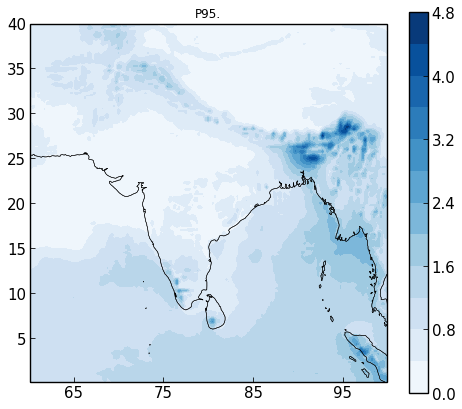

In [60]:
fig = plt.figure(figsize = (8,7))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent([60.1, 99.9, 0.1, 38])
gridliner = ax.gridlines(crs = ccrs.PlateCarree(), drawlabels=False, lw=1, color='gray', alpha=0.05, ls='--')
ax.add_feature(cfeature.COASTLINE, alpha=1.0, lw=0.5)
cf = ax.contourf(x, y, res_mon_24['precip_95'], cmap='Blues', levels=11)
plt.colorbar(cf)
ax.add_feature(cfeature.COASTLINE, alpha=1.0, lw=0.5)
gridliner.top_labels = False
gridliner.right_labels = False
gridliner.ylines = False
gridliner.xlines = False
ax.set_yticks(np.arange(5,45,5))
ax.set_xticks(np.arange(65,105,10))
ax.set_title('P95.', fontsize=12)

Text(0.5, 1.0, 'Precip.')

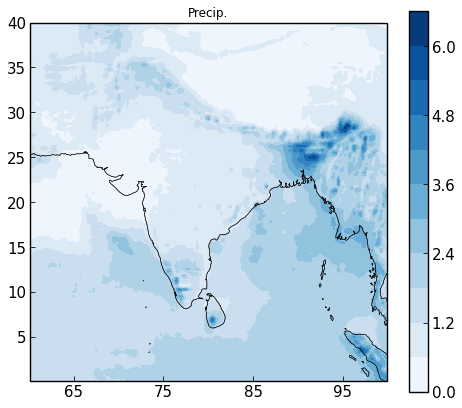

In [61]:
fig = plt.figure(figsize = (8,7))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent([60.1, 99.9, 0.1, 38])
gridliner = ax.gridlines(crs = ccrs.PlateCarree(), drawlabels=False, lw=1, color='gray', alpha=0.05, ls='--')
ax.add_feature(cfeature.COASTLINE, alpha=1.0, lw=0.5)
cf = ax.contourf(x, y, res_mon_24['precip_median'], cmap='Blues', levels=11)
plt.colorbar(cf)
ax.add_feature(cfeature.COASTLINE, alpha=1.0, lw=0.5)
gridliner.top_labels = False
gridliner.right_labels = False
gridliner.ylines = False
gridliner.xlines = False
ax.set_yticks(np.arange(5,45,5))
ax.set_xticks(np.arange(65,105,10))
ax.set_title('Precip.', fontsize=12)

Text(0.5, 1.0, 'Precip. anom')

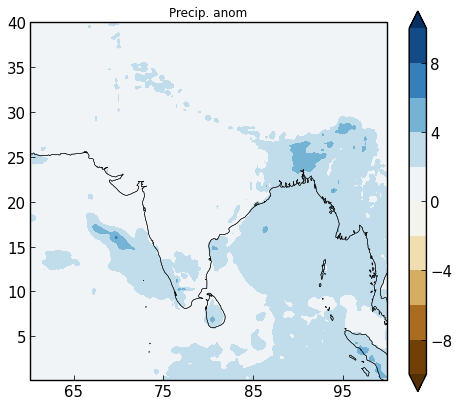

In [62]:
fig = plt.figure(figsize = (8,7))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent([60.1, 99.9, 0.1, 38])
gridliner = ax.gridlines(crs = ccrs.PlateCarree(), drawlabels=False, lw=1, color='gray', alpha=0.05, ls='--')
ax.add_feature(cfeature.COASTLINE, alpha=1.0, lw=0.5)
cf = ax.contourf(x, y, res_mon_24['precip_anom'], cmap=BrBU, levels=np.arange(-10, 12, 2), extend='both')
plt.colorbar(cf)
ax.add_feature(cfeature.COASTLINE, alpha=1.0, lw=0.5)
gridliner.top_labels = False
gridliner.right_labels = False
gridliner.ylines = False
gridliner.xlines = False
ax.set_yticks(np.arange(5,45,5))
ax.set_xticks(np.arange(65,105,10))
ax.set_title('Precip. anom', fontsize=12)

Text(0.5, 1.0, 'SAT')

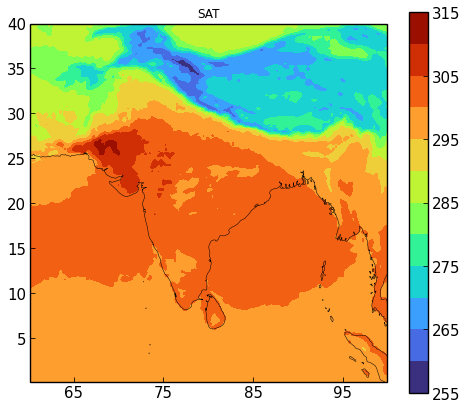

In [63]:
fig = plt.figure(figsize = (8,7))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent([60.1, 99.9, 0.1, 38])
gridliner = ax.gridlines(crs = ccrs.PlateCarree(), drawlabels=False, lw=1, color='gray', alpha=0.05, ls='--')
cf = ax.contourf(x, y, res_mon_24['t2m_median'], cmap='turbo', levels=11)
plt.colorbar(cf)
ax.add_feature(cfeature.COASTLINE, alpha=1.0, lw=0.5)
gridliner.top_labels = False
gridliner.right_labels = False
gridliner.ylines = False
gridliner.xlines = False
ax.set_yticks(np.arange(5,45,5))
ax.set_xticks(np.arange(65,105,10))
ax.set_title('SAT', fontsize=12)

Text(0.5, 1.0, 'SAT anom')

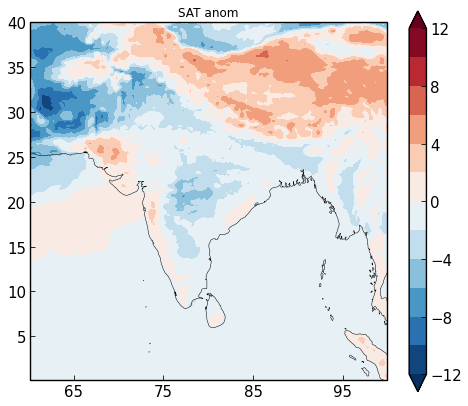

In [64]:
fig = plt.figure(figsize = (8,7))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent([60.1, 99.9, 0.1, 38])
gridliner = ax.gridlines(crs = ccrs.PlateCarree(), drawlabels=False, lw=1, color='gray', alpha=0.05, ls='--')
cf = ax.contourf(x, y, res_mon_24['t2m_anom'], cmap='RdBu_r', levels=np.arange(-12,14,2), extend='both')
plt.colorbar(cf)
ax.add_feature(cfeature.COASTLINE, alpha=1.0, lw=0.5)
gridliner.top_labels = False
gridliner.right_labels = False
gridliner.ylines = False
gridliner.xlines = False
ax.set_yticks(np.arange(5,45,5))
ax.set_xticks(np.arange(65,105,10))
ax.set_title('SAT anom', fontsize=12)

Text(0.5, 1.0, 'DPT')

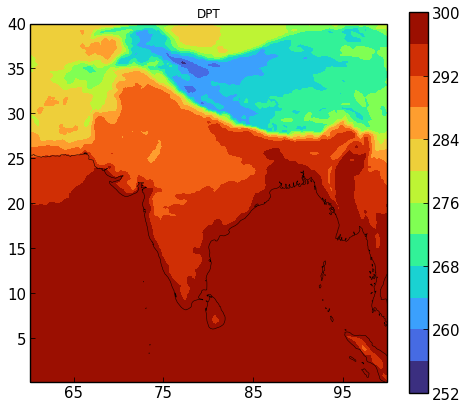

In [65]:
fig = plt.figure(figsize = (8,7))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent([60.1, 99.9, 0.1, 38])
gridliner = ax.gridlines(crs = ccrs.PlateCarree(), drawlabels=False, lw=1, color='gray', alpha=0.05, ls='--')
cf = ax.contourf(x, y, res_mon_24['d2m_median'], cmap='turbo', levels=11)
plt.colorbar(cf)
ax.add_feature(cfeature.COASTLINE, alpha=1.0, lw=0.5)
gridliner.top_labels = False
gridliner.right_labels = False
gridliner.ylines = False
gridliner.xlines = False
ax.set_yticks(np.arange(5,45,5))
ax.set_xticks(np.arange(65,105,10))
ax.set_title('DPT', fontsize=12)

Text(0.5, 1.0, 'DPT anom.')

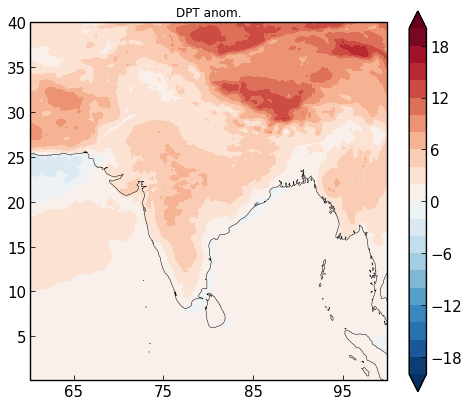

In [66]:
fig = plt.figure(figsize = (8,7))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent([60.1, 99.9, 0.1, 38])
gridliner = ax.gridlines(crs = ccrs.PlateCarree(), drawlabels=False, lw=1, color='gray', alpha=0.05, ls='--')
cf = ax.contourf(x, y, res_mon_24['d2m_anom'], cmap='RdBu_r', levels=np.arange(-20,22,2), extend='both')
plt.colorbar(cf)
ax.add_feature(cfeature.COASTLINE, alpha=1.0, lw=0.5)
gridliner.top_labels = False
gridliner.right_labels = False
gridliner.ylines = False
gridliner.xlines = False
ax.set_yticks(np.arange(5,45,5))
ax.set_xticks(np.arange(65,105,10))
ax.set_title('DPT anom.', fontsize=12)

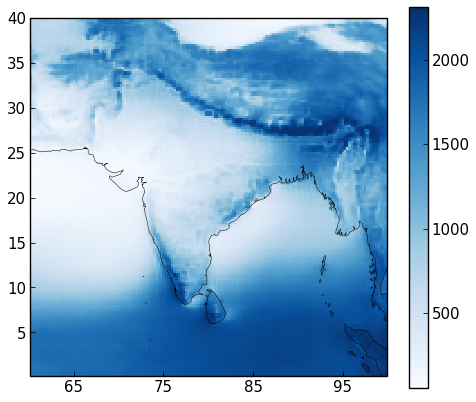

In [67]:
fig = plt.figure(figsize = (8,7))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent([60.1, 99.9, 0.1, 38])
gridliner = ax.gridlines(crs = ccrs.PlateCarree(), drawlabels=False, lw=1, color='gray', alpha=0.05, ls='--')
cf = ax.pcolormesh(x, y, res_mon_24['frequency'], cmap='Blues')
plt.colorbar(cf)
ax.add_feature(cfeature.COASTLINE, alpha=1.0, lw=0.5)
gridliner.top_labels = False
gridliner.right_labels = False
gridliner.ylines = False
gridliner.xlines = False
ax.set_yticks(np.arange(5,45,5))
ax.set_xticks(np.arange(65,105,10))
# ax.set_title('Freq.', fontsize=12)

In [68]:
for key in res_mon_24.keys():
    with open('./data/results/1H/premonsoon/'+key+'.npy', 'wb') as f:
        np.save(f, res_mon_24[key])


## Plotting

In [39]:
# Plotting function for 3d binning plot
def plot_3d(slope_da, p_da, extent_list, title, threshold_sig=0.001, marker_size=2, **kwargs):
    """
    Function to plot the output of binning 3d function
    -----
    inputs are -
    slope_da : datarray containing slope
    p_da : datarray containing R^2 values for goodness of fit
    title : The title of the output plot
    extent_list : [59.9, 100.1, -0.1, 40.1]
    """
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent(extent_list, crs=ccrs.PlateCarree())
    slope_da.plot.contourf(ax = ax, **kwargs)
    (100*(np.exp(slope_da) - 1)).plot.pcolormesh(ax = ax, cbar_kwargs={"label":"C-C scale"}, **kwargs)
    x, y = np.meshgrid(slope_da.coords['lon'], slope_da.coords['lat'])
    plt.scatter(x[(np.abs(p_da.to_numpy()) < threshold_sig)],y[(np.abs(p_da.to_numpy()) < threshold_sig)], marker='D', color = 'k', s=marker_size, alpha=0.3)
    gridliner = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.05, linestyle='--')
    # ax.coastlines(alpha=0.7)
    ax.add_feature(cfeature.BORDERS, alpha=1.0, lw = 0.2)
    ax.add_feature(cfeature.COASTLINE, alpha=1.0, lw = 0.5)
    gridliner.top_labels = False
    gridliner.right_labels = False
    gridliner.ylines = False  # you need False
    gridliner.xlines = False  # you need False
    ax.set_title(title)
    # ax.set_xlabel('Latitude')
    # ax.set_ylabel('Longitude')
    # ax.tick_params(axis='both', labelsize=12)

In [40]:
# Extent_lists
ind = [59.9, 100.1, -0.1, 40.1]
sip = [77.65, 84.1, 7.9, 18.85]
wcwg = [71.9, 77.15, 7.9, 18.85]
cir = [75.9, 86.1, 18.9, 26.1]

In [41]:
# colorbar levels defined

levels = np.arange(-70, 84, 14)
levels

array([-70, -56, -42, -28, -14,   0,  14,  28,  42,  56,  70])

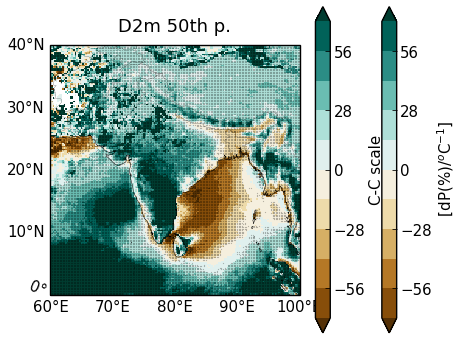

In [47]:
# India D2m 95th
plt.figure(figsize=(7,6))
plot_3d(d2m_slope_da50, d2m_p_da50, ind, 'D2m 50th p.', threshold_sig=0.05, marker_size=.04, levels=levels, extend='both')
# plt.savefig('./images/postmon/full95/india_d2m95.pdf', dpi=300)

## One region analysis

In [254]:
# cir -> 17,23; 72,84

In [40]:
from scipy import stats
import seaborn as sns

In [41]:
# ind_precip = precip.sel(lat=19, lon=72).load()
# ind_t2m = t2m.sel(lat=19, lon=72).load()

In [42]:
# ind_d2m = d2m.sel(lat=19,lon=72).load()

In [43]:
def get_binned(precip, temp, percentile_val = 0.99, bins = None, bin_nr = 12):
    # Getting the equal frequency bins
    if bins == None:
        bins = equal_obs(temp, bin_nr)
    else:
        bins = np.array(bins)

    # group the precipitation data according to the bins of temperature data
    binned_precip = precip.groupby_bins(temp, bins, include_lowest=True, precision=10).quantile(percentile_val, interpolation = 'midpoint')
    # group the temperature data by temperature bins and take mean of each bin
    mean_temp = temp.groupby_bins(temp, bins, include_lowest=True, precision=10).mean(dim="time")
    # return them
    return binned_precip, mean_temp

def equal_obs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x, axis= None))

In [51]:
p_t2m, mean_t2m = get_binned(precip, t2m, percentile_val=0.95, bin_nr=12)

In [52]:
p_d2m, mean_d2m = get_binned(precip, d2m, percentile_val=0.95, bin_nr=12)

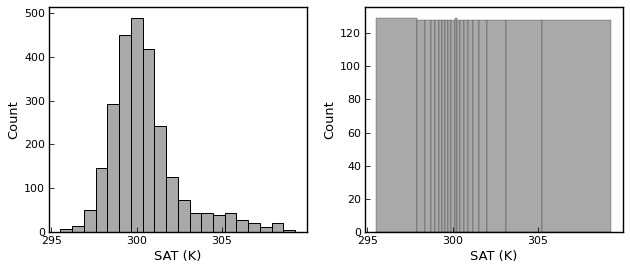

In [45]:
# sns.histplot(t2m, bins = equal_obs(t2m, 20), element='bars', alpha = 0.7, color='tab:blue')
plt.figure(figsize=(9,4))
plt.subplot(121)
sns.histplot(t2m, bins = 20, element='bars', alpha = 1.0, color='darkgrey')
plt.ylabel('Count', fontsize=13)
plt.xlabel('SAT (K)', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.subplot(122)
sns.histplot(t2m, bins = equal_obs(t2m, 20), element='bars', alpha = 1.0, color='darkgrey')
plt.ylabel('Count', fontsize=13)
plt.xlabel('SAT (K)', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.savefig('./images/methodology/t2m_binning.pdf', dpi=300)

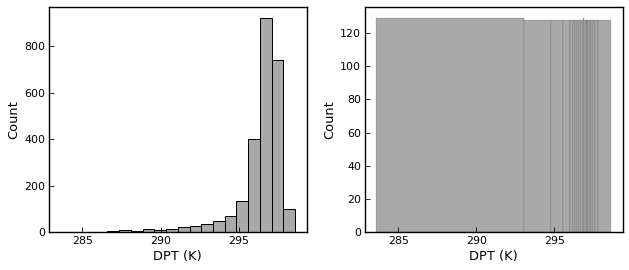

In [46]:
# sns.histplot(d2m, bins = equal_obs(d2m, 20), element='bars', alpha = 0.7, color='tab:blue')
plt.figure(figsize=(9,4))
plt.subplot(121)
sns.histplot(d2m, bins = 20, element='bars', alpha = 1.0, color='darkgrey')
plt.ylabel('Count', fontsize=13)
plt.xlabel('DPT (K)', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.subplot(122)
sns.histplot(d2m, bins = equal_obs(d2m, 20), element='bars', alpha = 1.0, color='darkgrey')
plt.ylabel('Count', fontsize=13)
plt.xlabel('DPT (K)', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.savefig('./images/methodology/d2m_binning.pdf', dpi=300)

In [47]:
# p95_d2m, mean_d2m = binning.get_binned_alter(ind_precip.mean(dim=['lat', 'lon']), ind_d2m.mean(dim=['lat', 'lon']), percentile_val=0.95, bin_nr=20)

In [53]:
mean_t2marr = mean_t2m.to_numpy()
p_t2marr = p_t2m.to_numpy()
mean_d2marr = mean_d2m.to_numpy()
p_d2marr = p_d2m.to_numpy()

In [78]:
# for t2m
t2m_ideal, precip1_ideal_t2m, precip2_ideal_t2m = ccplot.get_ideal_data(mean_t2marr, 70, 70, time_scale=1)
t2m_ideal_2, precip3_ideal_t2m, precip4_ideal_t2m = ccplot.get_ideal_data(mean_t2marr, 0.0001, 70, time_scale=2)

In [86]:
# for d2m
d2m_ideal, precip1_ideal_d2m, precip2_ideal_d2m = ccplot.get_ideal_data(mean_d2marr, 25.0, 25.0, time_scale=1)
d2m_ideal_2, precip3_ideal_d2m, precip4_ideal_d2m = ccplot.get_ideal_data(mean_d2marr, 0.0001, 25.0, time_scale=2)

In [73]:
def plot_cc(binned_precip, mean_temp, temparr, preciparr1, preciparr2, preciparr3, preciparr4, fit = True, **kwargs):
    # Make the figure
    if fit == True:
        # get the slope and intercept of the data to be plotted
        slope, intercept, r, _, _ = stats.linregress(mean_temp, np.log(binned_precip))
        # start plotting
        plt.scatter(mean_temp, binned_precip, **kwargs)
        plt.semilogy(temparr, preciparr1, 'k-', alpha = 0.2)
        # plt.semilogy(temparr, preciparr2, 'k-', alpha = 0.2)
        # plt.semilogy(temparr, preciparr3, 'k--', alpha = 0.2)
        plt.semilogy(temparr, preciparr4, 'k--', alpha = 0.2)
        plt.plot(mean_temp, np.exp(slope*mean_temp + intercept), color = 'k', ls = '-', alpha = 0.8, label = f'C-C scale = {np.round(100*(np.exp(slope) - 1), 3)}; $R^2$ = {np.round(r,3)}')
        plt.xlim(mean_temp.min()-0.01, mean_temp.max()+0.01)
        # plt.yticks([1, 10, 100])
        plt.legend(frameon = False, fontsize = 11, loc='upper left')

    elif fit == False:
        slope, _, r, _, _ = stats.linregress(mean_temp, np.log(binned_precip))
        # start plotting
        plt.semilogy(mean_temp, binned_precip, label = f'C-C scale = {np.round(100*(np.exp(slope) - 1), 3)}; $R^2$ = {np.round(r,3)}', **kwargs)
        plt.semilogy(temparr, preciparr1, 'k-', alpha = 0.2)
        # plt.semilogy(temparr, preciparr2, 'k-', alpha = 0.2)
        # plt.semilogy(temparr, preciparr3, 'k--', alpha = 0.2)
        plt.semilogy(temparr, preciparr4, 'k--', alpha = 0.2)
        plt.xlim(mean_temp.min()-0.01, mean_temp.max()+0.01)
        # plt.yticks([1, 10, 100])
        plt.legend(frameon = False, fontsize = 11, loc='upper left')

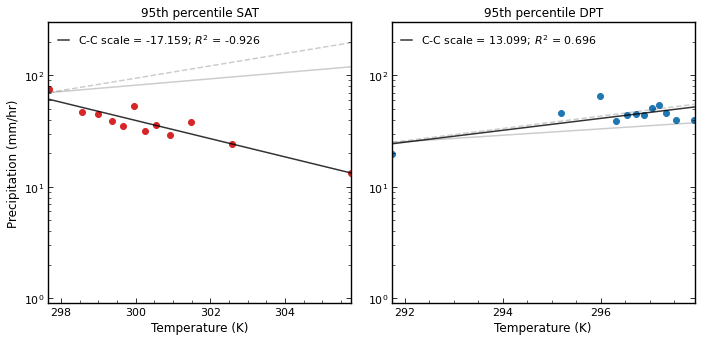

In [87]:
fig = plt.figure(figsize=(10,5))

plt.subplot(121)
plot_cc(p_t2marr, mean_t2marr, t2m_ideal, precip1_ideal_t2m, precip2_ideal_t2m, precip3_ideal_t2m, precip4_ideal_t2m, fit=True, color = 'tab:red')
plt.ylabel('Precipitation (mm/hr)', fontsize=12)
plt.xlabel('Temperature (K)', fontsize=12)
plt.title('95th percentile SAT', fontsize=12)
plt.minorticks_on()
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.gca().set_yticklabels([], minor=True)
# plt.ylim(0.,1.1)
plt.ylim(0.9,300)
# plt.xlim(297,310)

fig.gca().yaxis.set_ticks_position('both')

plt.subplot(122)
plot_cc(p_d2marr, mean_d2marr, d2m_ideal, precip1_ideal_d2m, precip2_ideal_d2m, precip3_ideal_d2m, precip4_ideal_d2m, fit=True, color = 'tab:blue')
# plt.ylabel('Precipitation (mm/hr)')
plt.ylim(0.8, 6)
plt.xlabel('Temperature (K)', fontsize=12)
plt.title('95th percentile DPT', fontsize=12)
plt.minorticks_on()
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.gca().set_yticklabels([], minor=True)
# plt.ylim(0.2,1.1)
plt.ylim(0.9,300)
# plt.xlim(297,300)

fig.gca().yaxis.set_ticks_position('both')
fig.tight_layout()
plt.savefig('./images/methodology/single.pdf', dpi = 300)

In [60]:
slope_imd_mon95 = xr.open_dataarray('./data/results/imd/24H/monsoon/full95/d2m_slope.nc')        

In [68]:
cc = (100 * (np.exp(slope_imd_mon95) - 1))
cc1 = cc.where(cc < 14)
cc2 = cc1.where(cc1 > 7)

In [72]:
cc2

<xarray.DataArray (lat: 129, lon: 135)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0

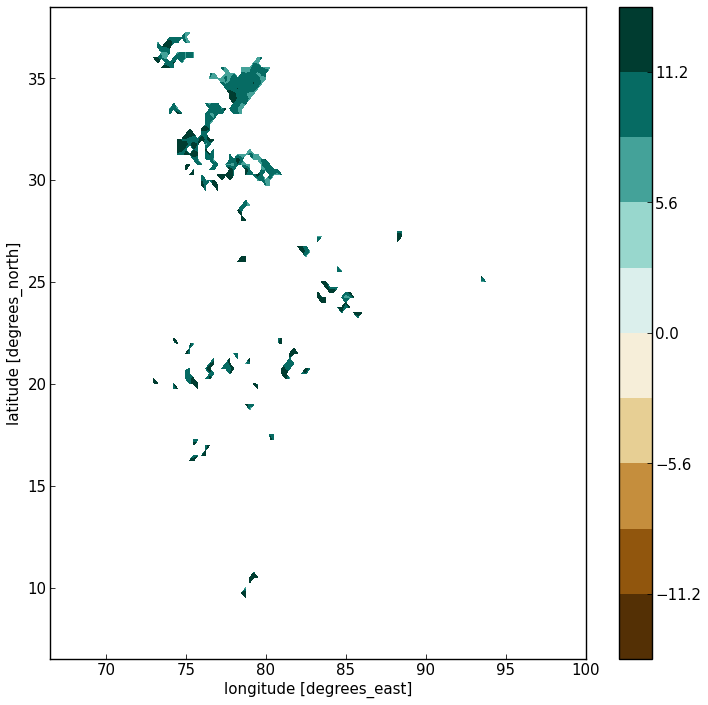

In [71]:
plt.figure(figsize=(12,12))
(cc2).plot.contourf(vmin=-14, vmax=14, levels=11, cmap = 'BrBG')

In [77]:
cc2.isel(lat = 70, lon = 74)

<xarray.DataArray ()>
array(11.03778524)
Coordinates:
    lat      float64 24.0
    lon      float64 85.0